# Trainer

In [1]:
import cv2
from super_resolution import *
%matplotlib inline

In [2]:
tf.reset_default_graph()

In [3]:
# variables
height = 41
width = 41
channel = 3
stride = (21,21)
resize_scale=2

img_list = []
img_list = load_img_list_and_extract_patch_list("./data/urban_hr", size=(width, height),stride=stride)
img_list.extend(img_list)

X_all = np.array(blur_img_list(img_list, resize_scale))
Y_all = np.array(img_list)

mean_img = np.mean(Y_all, axis=0)
std_img = np.std(Y_all, axis=0)

train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 0.1

data_num = len(X_all)
train_data_num = round(data_num * train_ratio)
valid_data_num = round(data_num * valid_ratio)
test_data_num = round(data_num * test_ratio)

X_train = X_all[:train_data_num]
Y_train = Y_all[:train_data_num]

X_valid = X_all[train_data_num:train_data_num + valid_data_num]
Y_valid = Y_all[train_data_num:train_data_num + valid_data_num]
X_test = X_all[train_data_num + valid_data_num:train_data_num + valid_data_num + test_data_num]
Y_test = Y_all[train_data_num + valid_data_num:train_data_num + valid_data_num + test_data_num]

# data shuffle
rand_idx = np.random.permutation(range(len(Y_valid)))
X_valid = X_valid[rand_idx]
Y_valid = Y_valid[rand_idx]

rand_idx = np.random.permutation(range(len(Y_test)))
X_test = X_test[rand_idx]
Y_test = Y_test[rand_idx]

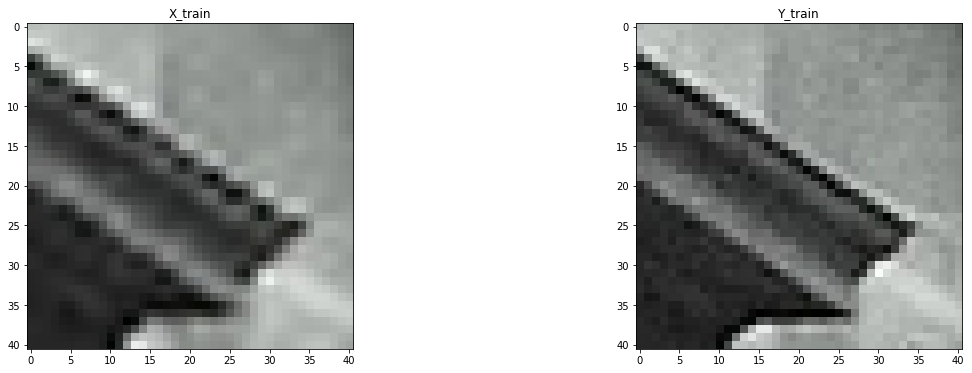

In [4]:
img_idx = 2

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
axs[0].imshow(X_train[img_idx])
axs[0].set_title("X_train")
axs[1].imshow(Y_train[img_idx])
axs[1].set_title("Y_train")

In [5]:
print("num data")
print("="*30)
print("length X_train : {} ". format(len(X_train)))

num data
length X_train : 247078 


In [6]:
sess = tf.Session()
usrcnn = USRCNN(sess)

local_output_concat shape : [9, None, 41, 41, 3]
average_image shape : [None, 41, 41, 3]
Y_pred shape : [None, 41, 41, 3]
Y shape : [None, 41, 41, 3]


In [7]:
#usrcnn.load(sess,'./model/weights','./model/meta_data.pickle')

In [ ]:
usrcnn.train(X_train, Y_train, X_valid=X_valid[:200], Y_valid=Y_valid[:200],
              batch_size=64, n_epoch=10, start_learning_rate=0.01, save_dir_path='./model')

epoh_i : 0
loss : 272.7763366699219
------------------------------
Saved!
weights_path : ./model/weights
meta_data_path : ./model/meta_data.pickle
------------------------------
epoh_i : 1


In [9]:
import os
def load_imgs_2(dir_path):
    name_list = os.listdir(dir_path)

    img_list = []

    for name in name_list:
        img_path = "{}/{}".format(dir_path, name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img_list.append(img)
    return img_list

In [18]:
test_img_list = load_imgs_2("./data/urban_hr")
test_img = test_img_list[50]
test_img = test_img[200:350,250:400]

test_img_resized = cv2.resize(test_img, (round(test_img.shape[1]/2), round(test_img.shape[0]/2)))
test_img_resized = cv2.resize(test_img_resized, (test_img.shape[1],test_img.shape[0]), interpolation = cv2.INTER_CUBIC)


In [15]:
usrcnn.load(sess,'./model/weights','./model/meta_data.pickle')

In [20]:
result = usrcnn.enhance_resolution(test_img_resized)

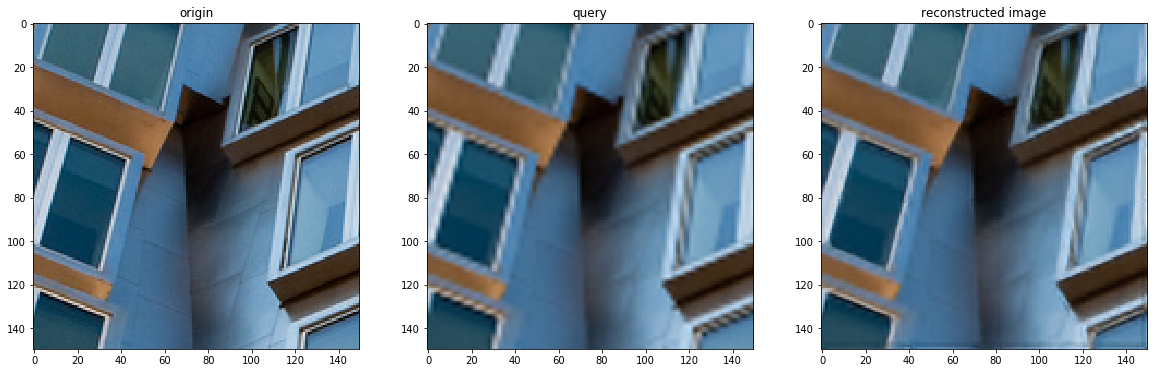

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].imshow(test_img)
axs[0].set_title("origin")
axs[1].imshow(test_img_resized)
axs[1].set_title("query")
axs[2].imshow(result)
axs[2].set_title("reconstructed image")

In [ ]:
plt.imshow(usrcnn.mean_img.astype(np.uint8))

In [ ]:
plt.imshow(usrcnn.std_img.astype(np.uint8))

In [ ]:
usrcnn.std_img

In [ ]:
img = X_valid[1]

In [ ]:
plt.imshow(img)